<h1 align=center><font size = 5> Identifying persons of interest in data </font> </h1>

<h2 align=center>Synopsis</h2>

Enron was one of the largest sellers of natural gas in North America in the early 1990s, and was rated the most innovative large company in America in a Fortune's Most Admired Companies survey in the early 2000s. Although they achieved record revenues during that time span, by 2002 they had gone bankrupt due to corporate fraud.  In this project, I will be investigating financial and email data from Enron, in an attempt to construct a person of interest identifier. 
 
 
 


### Sources
* Data source 1 : https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz 
* Data source 2 : https://github.com/udacity/ud120-projects
 

In [1]:
import sys
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



Let's begin by loading in the financial data from our pickle file

In [2]:
infile = open("final_project_dataset.pkl",'rb')
data = pickle.load(infile, encoding='latin1')

Data is a dictionary containing financial information on different employees within Enron.
Let's get a sense for what the data looks like using a dataframe

In [3]:
df = pd.DataFrame(data)
df.head()

,METTS MARK,BAXTER JOHN C,ELLIOTT STEVEN,CORDES WILLIAM R,HANNON KEVIN P,MORDAUNT KRISTINA M,MEYER ROCKFORD G,MCMAHON JEFFREY,HAEDICKE MARK E,PIPER GREGORY F,...,SAVAGE FRANK,IZZO LAWRENCE L,TILNEY ELIZABETH A,MARTIN AMANDA K,BUY RICHARD B,GRAMM WENDY L,CAUSEY RICHARD A,TAYLOR MITCHELL S,DONAHUE JR JEFFREY M,GLISAN JR BEN F
salary,365788,267102,170941,NaN,243293,267093,NaN,370448,374125,197091,...,NaN,85274,247338,349487,330546,NaN,415189,265214,278601,274975
to_messages,807,NaN,NaN,764,1045,NaN,232,2355,4009,1238,...,NaN,496,460,1522,3523,NaN,1892,533,865,873
deferral_payments,NaN,1295738,NaN,NaN,NaN,NaN,1848227,NaN,2157527,1130036,...,NaN,NaN,NaN,85430,649584,NaN,NaN,227449,NaN,NaN
total_payments,1061827,5634343,211725,NaN,288682,628522,1848227,4099771,3859065,1737629,...,3750,1979596,399393,8407016,2355702,119292,1868758,1092663,875760,1272284
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's switch the order of the row and column headers


In [4]:
df = df.T
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [5]:
# Lets investigate what the data types are
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
loan_advances                146 non-null object
bonus                        146 non-null object
email_address                146 non-null object
restricted_stock_deferred    146 non-null object
deferred_income              146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
from_poi_to_this_person      146 non-null object
exercised_stock_options      146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null object
long_term_incentive          146 non-null obje

Most of these values are objects, making it difficult to use the numerical values directly. 

Let's create a function to extract the values for a value like expenses

In [6]:
def featureFormat(dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append(float(value))

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
            
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
                    
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
                
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [7]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features


In [8]:
# Let's explore expenses and deferreal_payments as an example and check what the data type is
features_list = ['poi','expenses','deferral_payments']

test_data = featureFormat(data, features_list)
poi, financials = targetFeatureSplit(test_data)

financials = np.reshape(financials,(len(financials),2))
type(poi[0]), type(financials[0,0]), type(financials[0,1])

 

(numpy.float64, numpy.float64, numpy.float64)

They are float values. We can convert most of the attributes from object to floats


In [9]:
# Let's see how many NaN's we have in the original datafram
Nan_df = df.isnull()
#Nan_df

#df.isnull().sum()

# Do we have missing values in our labels column?
Nan_df["poi"].value_counts()

False    146
Name: poi, dtype: int64

In [10]:
# Let's see how the values for each feature are distributed
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")  

salary
NaN       51
278601     2
265214     1
492375     1
415189     1
          ..
162779     1
365788     1
477        1
267102     1
63744      1
Name: salary, Length: 95, dtype: int64

to_messages
NaN     60
383      1
2350     1
2192     1
898      1
        ..
1238     1
2647     1
2649     1
865      1
128      1
Name: to_messages, Length: 87, dtype: int64

deferral_payments
NaN         107
214678        1
2964506       1
7961          1
2157527       1
684694        1
2869717       1
77716         1
16586         1
93585         1
564348        1
6426990       1
3131860       1
10259         1
73122         1
27610         1
32083396      1
831299        1
774401        1
2144013       1
202911        1
181755        1
842924        1
1295738       1
53625         1
85430         1
1130036       1
649584        1
-102500       1
187469        1
204075        1
504610        1
50591         1
181993        1
875307        1
260455        1
51365         1
178980        1
184822

In [11]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,...,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,...,60,44,60,53,60,128,80,60,36,129


In [12]:
# Deferral_payments, loan_advances, restricted_stock_deferred and director_fees all have over 68% of their data missing

# We will drop those columns
df.drop(columns=['deferral_payments', 'loan_advances', 'restricted_stock_deferred','director_fees'],inplace=True)

In [13]:
# Make a list of the headers
attributes = df.columns
attributes

Index(['salary', 'to_messages', 'total_payments', 'bonus', 'email_address',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock'],
      dtype='object')

In [14]:
# Create new data frame 
df2 = pd.DataFrame()

In [15]:
# Convert to float
for l in attributes:
    if l != "email_address":
         df2[l] = df[l].astype("float")
    if l == "email_address":    
        df2[l] = df[l]


In [16]:
df2.head()

,salary,to_messages,total_payments,bonus,email_address,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,mark.metts@enron.com,NaN,585062.0,94299.0,38.0,NaN,29.0,1740.0,1.0,0.0,NaN,702.0,585062.0
BAXTER JOHN C,267102.0,NaN,5634343.0,1200000.0,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,0.0,1586055.0,NaN,3942714.0
ELLIOTT STEVEN,170941.0,NaN,211725.0,350000.0,steven.elliott@enron.com,-400729.0,6678735.0,78552.0,NaN,4890344.0,NaN,12961.0,NaN,0.0,NaN,NaN,1788391.0
CORDES WILLIAM R,NaN,764.0,NaN,NaN,bill.cordes@enron.com,NaN,1038185.0,NaN,10.0,651850.0,12.0,NaN,0.0,0.0,NaN,58.0,386335.0
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,kevin.hannon@enron.com,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1.0,1617011.0,1035.0,853064.0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 17 columns):
salary                     95 non-null float64
to_messages                86 non-null float64
total_payments             125 non-null float64
bonus                      82 non-null float64
email_address              146 non-null object
deferred_income            49 non-null float64
total_stock_value          126 non-null float64
expenses                   95 non-null float64
from_poi_to_this_person    86 non-null float64
exercised_stock_options    102 non-null float64
from_messages              86 non-null float64
other                      93 non-null float64
from_this_person_to_poi    86 non-null float64
poi                        146 non-null float64
long_term_incentive        66 non-null float64
shared_receipt_with_poi    86 non-null float64
restricted_stock           110 non-null float64
dtypes: float64(16), object(1)
memory usage: 20.5+ KB


In [18]:
# Replace the nan values and replace by median value
#df.median()
#df2.replace("NaN", df2.median(), inplace = True)
df2.fillna(df2.median(),inplace=True)

In [19]:
# Let's see how many NaN's we have
Nan_df = df2.isnull()

# Do we have missing values in our labels column?
Nan_df["poi"].value_counts()

False    146
Name: poi, dtype: int64

In [20]:
df2.head()

,salary,to_messages,total_payments,bonus,email_address,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,mark.metts@enron.com,-159792.0,585062.0,94299.0,38.0,1310813.5,29.0,1740.0,1.0,0.0,442035.0,702.0,585062.0
BAXTER JOHN C,267102.0,1211.0,5634343.0,1200000.0,NaN,-1386055.0,10623258.0,11200.0,35.0,6680544.0,41.0,2660303.0,8.0,0.0,1586055.0,740.5,3942714.0
ELLIOTT STEVEN,170941.0,1211.0,211725.0,350000.0,steven.elliott@enron.com,-400729.0,6678735.0,78552.0,35.0,4890344.0,41.0,12961.0,8.0,0.0,442035.0,740.5,1788391.0
CORDES WILLIAM R,259996.0,764.0,1101393.0,769375.0,bill.cordes@enron.com,-159792.0,1038185.0,46950.0,10.0,651850.0,12.0,52382.0,0.0,0.0,442035.0,58.0,386335.0
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,kevin.hannon@enron.com,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1.0,1617011.0,1035.0,853064.0


We can get a sense of how well the data points correlate to the person of  interest indicator column using `corr`.

In [21]:
df2.corr()

,salary,to_messages,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock
salary,1.000000,-0.005165,0.955788,0.993238,-0.972497,0.989781,0.994940,-0.005831,0.987779,-0.015470,0.962254,-0.014778,-0.013742,0.991510,-0.001332,0.987621
to_messages,-0.005165,1.000000,0.035444,0.038198,-0.006109,-0.001817,-0.007671,0.547272,-0.007926,0.496937,0.007307,0.587533,0.079963,-0.001991,0.855214,0.006720
total_payments,0.955788,0.035444,1.000000,0.962105,-0.924588,0.968313,0.945334,0.041925,0.965179,-0.017092,0.982783,-0.002958,0.047604,0.960718,0.052727,0.965416
bonus,0.993238,0.038198,0.962105,1.000000,-0.970737,0.987277,0.987875,0.058234,0.985303,-0.001982,0.959549,0.035179,0.012120,0.988831,0.056796,0.984032
deferred_income,-0.972497,-0.006109,-0.924588,-0.970737,1.000000,-0.966490,-0.965596,-0.021329,-0.966196,0.012243,-0.943023,0.017097,-0.032800,-0.968653,-0.033557,-0.959316
total_stock_value,0.989781,-0.001817,0.968313,0.987277,-0.966490,1.000000,0.982877,0.001055,0.998764,-0.021995,0.971451,-0.018079,0.032915,0.985482,0.003695,0.993241
expenses,0.994940,-0.007671,0.945334,0.987875,-0.965596,0.982877,1.000000,-0.020884,0.980925,-0.010493,0.951323,-0.016490,-0.023835,0.984941,-0.006113,0.981076
from_poi_to_this_person,-0.005831,0.547272,0.041925,0.058234,-0.021329,0.001055,-0.020884,1.000000,0.000316,0.220988,0.024992,0.470194,0.172248,0.010291,0.676288,-0.001293
exercised_stock_options,0.987779,-0.007926,0.965179,0.985303,-0.966196,0.998764,0.980925,0.000316,1.000000,-0.025643,0.967214,-0.022352,0.041009,0.983800,-0.001197,0.986779
from_messages,-0.015470,0.496937,-0.017092,-0.001982,0.012243,-0.021995,-0.010493,0.220988,-0.025643,1.000000,-0.036525,0.605422,-0.034752,-0.019081,0.265504,-0.017209


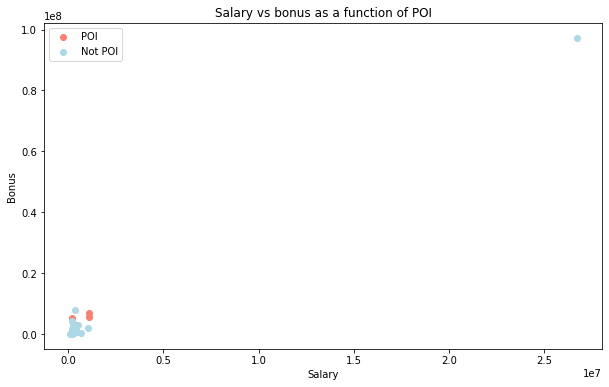

In [22]:
# Let's do a quick test for outliers by plotting 2 highly correlated features
%matplotlib inline
#plt.scatter(df2["salary"],df2["bonus"])
#plt.show()

#Create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df2.salary[df.poi==1], df.bonus[df.poi==1], color="salmon")

# Scatter with negative examples
plt.scatter(df2.salary[df.poi==0], df.bonus[df.poi==0], c="lightblue");

# Add some helpful info
plt.title("Salary vs bonus as a function of POI")
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.legend(["POI","Not POI"]);

It appears we have an outlier point which is much bigger than the rest of the data. Let's identify which key this value belongs to

In [23]:
df2[["salary","bonus"]].idxmax(axis = 0)

salary    TOTAL
bonus     TOTAL
dtype: object

The key giving the largest value is total, which is clearly an outlier. Therefore this should be removed before processing

In [24]:
list(df2.index)

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HAEDICKE MARK E',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'NOLES JAMES L',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H',
 'SHAPIRO RICHARD S'

`Total` is indeed the outlier point. Let's remove it from the data dictionary

In [25]:
# remove the total "key"
data.pop('TOTAL',0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [26]:
# Create an updated dataframe
df = pd.DataFrame(data)

df = df.T
attributes = df.columns


# Create new data frame 
df2 = pd.DataFrame()

# Remove the nan values
#df.replace("NaN", 0, inplace = True)

# Create new datafram
for l in attributes:
    if l != "email_address":
         df2[l] = df[l].astype("float")
    if l == "email_address":    
        df2[l] = df[l]
 

df2.fillna(df2.median(),inplace=True)


In [27]:
# We will drop those columns again
df2.drop(columns=['deferral_payments', 'loan_advances', 'restricted_stock_deferred','director_fees'],inplace=True)


##  Data wrangling

Now we've gotten some sort of pre-processing going, we would like to apply some transforms to the data, specfically

 <li><a href="data_acquisition">Feature scaling</a>
     <li><a href="data_acquisition">Binning</a>
  <li><a href="#basic_insight">Addition of new features</a></li>

A number of the features appear to have an influence on the person of interest (`poi`). `salary`, `bonus`, `total_stock_value` are among the major financial features influencing the poi values.  The number of messages from poi to a given person (`from_poi_to_this_person`) and number of shared emails with pois (`shared_receipt_with_poi`) were among the major email features influencing the poi values.

`deferral_payments`, `restricted_stock_deferred`, `from_messages` appear to be very weakly correlated with poi so we can assume these values are not important in classifiying if a person was a person of interest or not. 


In [28]:
# Let's see how well the values correlate with the poi
df2.corr()

,salary,to_messages,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock
salary,1.000000,0.243211,0.577069,0.521865,-0.273225,0.559135,0.136488,0.241933,0.503952,0.060406,0.588588,0.093166,0.267983,0.478454,0.335390,0.523290
to_messages,0.243211,1.000000,0.169849,0.436185,-0.108498,0.112027,0.154194,0.547068,0.071395,0.496733,0.089696,0.587353,0.079367,0.128410,0.855146,0.151735
total_payments,0.577069,0.169849,1.000000,0.572144,-0.090785,0.661304,0.116283,0.191451,0.598902,0.003832,0.828491,0.051434,0.236964,0.530818,0.229204,0.601975
bonus,0.521865,0.436185,0.572144,1.000000,-0.289258,0.466387,0.071490,0.587775,0.429457,0.128399,0.381091,0.412555,0.318428,0.448913,0.589391,0.391400
deferred_income,-0.273225,-0.108498,-0.090785,-0.289258,1.000000,-0.246667,0.049645,-0.174618,-0.265265,-0.026463,-0.254596,-0.012100,-0.261309,-0.256042,-0.230723,-0.114699
total_stock_value,0.559135,0.112027,0.661304,0.466387,-0.246667,1.000000,0.054850,0.132488,0.960461,-0.017078,0.632993,0.014575,0.378554,0.424961,0.157348,0.779951
expenses,0.136488,0.154194,0.116283,0.071490,0.049645,0.054850,1.000000,0.007675,0.036573,0.103192,0.085025,0.050274,0.084926,-0.029440,0.197145,0.075905
from_poi_to_this_person,0.241933,0.547068,0.191451,0.587775,-0.174618,0.132488,0.007675,1.000000,0.120838,0.220663,0.149672,0.469957,0.171701,0.215517,0.676128,0.110538
exercised_stock_options,0.503952,0.071395,0.598902,0.429457,-0.265265,0.960461,0.036573,0.120838,1.000000,-0.036721,0.550158,-0.010359,0.402700,0.402351,0.121010,0.588618
from_messages,0.060406,0.496733,0.003832,0.128399,-0.026463,-0.017078,0.103192,0.220663,-0.036721,1.000000,-0.059350,0.605263,-0.035380,0.003394,0.265177,0.010644


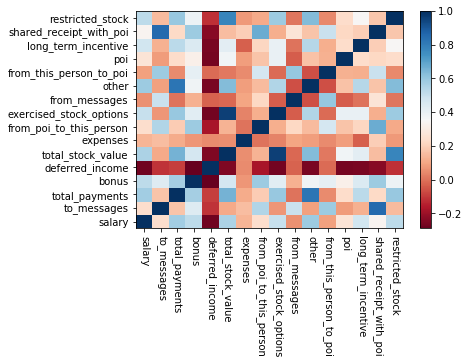

In [29]:
# Visualization of this correlation matrix
fig, ax = plt.subplots()
im = ax.pcolor(df2.corr(), cmap='RdBu')

#label names
row_labels = df2.corr().columns 
col_labels = df2.corr().index

#move ticks and labels to the center
ax.set_xticks(np.arange(df2.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df2.corr().shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=270)

fig.colorbar(im)
plt.show()

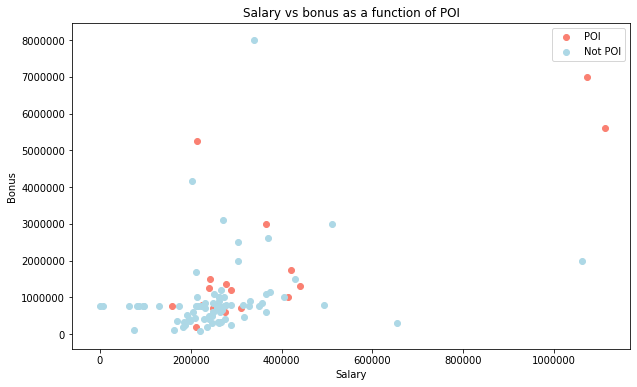

In [30]:
# Again compare salary and bonus

#Create figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df2.salary[df2.poi==1], df2.bonus[df2.poi==1], color="salmon")

# Scatter with negative examples
plt.scatter(df2.salary[df2.poi==0], df2.bonus[df2.poi==0], c="lightblue");

# Add some helpful info
plt.title("Salary vs bonus as a function of POI")
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.legend(["POI","Not POI"]);

Looks like the major outlier has been removed. The plot also seems to suggest the poi's tend to lean towards having higher salaries, and bonuses.

Now lets further explore data 

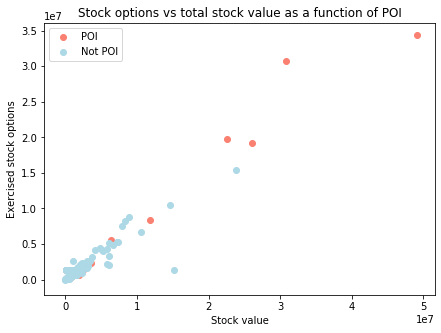

In [31]:
## Let's observe the relationship between the exercised stock options and total stock value
 
#pd.crosstab(df2['poi'], [df2['total_stock_value'], df2['exercised_stock_options']] )
plt.figure(figsize=(7,5))

#scatter with positive examples
plt.scatter(df2.total_stock_value[df2.poi==1], df2.exercised_stock_options[df2.poi==1], color="salmon")

# Scatter with negative examples
plt.scatter(df2.total_stock_value[df2.poi==0], df2.exercised_stock_options[df2.poi==0], c="lightblue");

# Add some helpful info
plt.title("Stock options vs total stock value as a function of POI")
plt.xlabel("Stock value")
plt.ylabel("Exercised stock options")
plt.legend(["POI","Not POI"]);

The data suggests a positive relationship between Salary and bonus, and a very positive relationship between stock value and exercised stock options.  

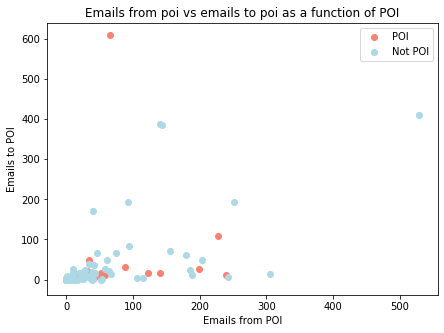

In [32]:
#Create another figure
plt.figure(figsize=(7,5))

#scatter with positive examples
plt.scatter(df2.from_poi_to_this_person[df2.poi==1], df2.from_this_person_to_poi[df2.poi==1], color="salmon")

# Scatter with negative examples
plt.scatter(df2.from_poi_to_this_person[df2.poi==0], df2.from_this_person_to_poi[df2.poi==0], c="lightblue");

# Add some helpful info
plt.title("Emails from poi vs emails to poi as a function of POI")
plt.xlabel("Emails from POI")
plt.ylabel("Emails to POI")
plt.legend(["POI","Not POI"]);

 Emails don't appear to show any strong pattern in the emails to and from the POIs, except maybe a slight rightwards shift of the POI email interactions

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


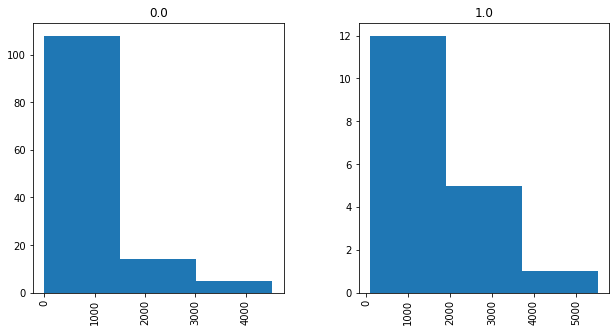

In [33]:
fig, axes = plt.subplots( figsize=(10,5))
df2.hist(column='shared_receipt_with_poi', by='poi', bins=3, ax=axes);

#df2.hist(column='shared_receipt_with_poi', bins=3, ax=axes[1])

# set x/y labels and plot title
#plt.xlabel("Emails from POI")
#plt.ylabel("Frequency")
#plt.title("Emails from POI")


The majority of the person's of interest appear to fall in the higher range for shared emails, particularly
around the 1000 emails band. However, the frequency is not distinct enough to create groups that would be
easily deicpherable. 

# Scaling data

We begin by rescaling the financial data

In [34]:
from sklearn.preprocessing import MinMaxScaler 

X =  df2.drop(columns= ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'],axis=1)

mms = MinMaxScaler()
Financial_scaled = mms.fit_transform(X)
Financial_scaled.shape

(145, 11)

In [35]:
# Put values back into the data fram

columns = X.columns

columns.shape
index = range(len(columns))
for i in index:
    df2[columns[i]] = Financial_scaled[:,i]
    


In [36]:
# You need to also rescale the text messages 

Y =  df2[['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']]

mms = MinMaxScaler()
email_scaled = mms.fit_transform(Y)
email_scaled.shape

# Put values back into the data fram

columns = Y.columns

columns.shape
index = range(len(columns))
for i in index:
    df2[columns[i]] = emaill_scaled[:,i]
    


ValueError: could not convert string to float: 'mark.metts@enron.com'

In [ ]:
df2.head(6)

In [ ]:
# Combine values
df2["Earnings"] = df2["salary"] + df2["bonus"]
df2["Stock_earnings"] = df2["total_stock_value"] + df2["exercised_stock_options"]
df2["total_poi_emails_person"] = df2['from_poi_to_this_person'] + df2['from_this_person_to_poi'] + df2["shared_receipt_with_poi"]



In [ ]:
df2.corr()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

We see the new features for the most part increased the correlations, so we can procede with our analysis

## Model Development

We're going to try 4 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifiers
3. Random Forest Classifier
4. Linear SVC

In the case of the Linear SVC we might first apply a rank reduction using PCA, before feeding it to the SVC to cut down on 
computation time.

In logistic Regression, a few features will be selected to avoid redundancy. The three main features investigated would be:
* Earnings
* Total_poi_emails_person (May not be used)
* Stock Earnings
